- **Purpose:** To go through the LADAL tutorial on fitting linear mixed-effects models in R. A different dataset was used, though.
- **Link:** https://ladal.edu.au/tutorials/mixedmodel/mixedmodel.html#linear-mixed-effects-regression
- **Date:** August 05, 2025

# 1. Library and data

In [ ]:
# Install libraries
req_libraries <- c(
    "Boruta",
    "car",
    "emmeans",
    "effects",
    #"glmulti",
    "ggpubr",
    "Hmisc",
    "lme4",
    "MASS",
    "mclogit",
    "MuMIn",
    "nlme",
    "ordinal",
    "rms",
    "robustbase",
    "sjPlot",
    "vcd",
    "gridExtra",
    "tidyverse",
    "flextable"
)

for (pkg in req_libraries) {
    if (!require(pkg, character.only = TRUE)) {
      install.packages(pkg)
        library(pkg, character.only = TRUE)
    }
}


Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()  masks nlme::collapse()
✖ dplyr::combine()   masks gridExtra::combine()
✖ tidyr::expand()    masks Matrix::expand()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ tidyr::pack()      masks Matrix::pack()
✖ dplyr::recode()    masks car::recode()
✖ dplyr::select()    masks MASS::select()
✖ dplyr::slice()     masks ordinal::slice()
✖ purrr::some()      masks car::some()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()
✖ tidyr::unpack()    masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts

In [ ]:
# Data of sleepstudy
data(sleepstudy)

# 2. EDA

In [ ]:
# Structure of the dataframe
str(sleepstudy)

'data.frame':	180 obs. of  3 variables:
 $ Reaction: num  250 259 251 321 357 ...
 $ Days    : num  0 1 2 3 4 5 6 7 8 9 ...
 $ Subject : Factor w/ 18 levels "308","309","310",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# Glimpse into the dataframe
glimpse(sleepstudy)

Rows: 180
Columns: 3
$ Reaction <dbl> 249.5600, 258.7047, 250.8006, 321.4398, 356.8519, 414.6901, 3…
$ Days     <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0…
$ Subject  <fct> 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 309, 309, 3…


In [ ]:
#  Summarize the dataset
summary(sleepstudy)

    Reaction          Days        Subject   
 Min.   :194.3   Min.   :0.0   308    : 10  
 1st Qu.:255.4   1st Qu.:2.0   309    : 10  
 Median :288.7   Median :4.5   310    : 10  
 Mean   :298.5   Mean   :4.5   330    : 10  
 3rd Qu.:336.8   3rd Qu.:7.0   331    : 10  
 Max.   :466.4   Max.   :9.0   332    : 10  
                               (Other):120  

`geom_smooth()` using formula = 'y ~ x'


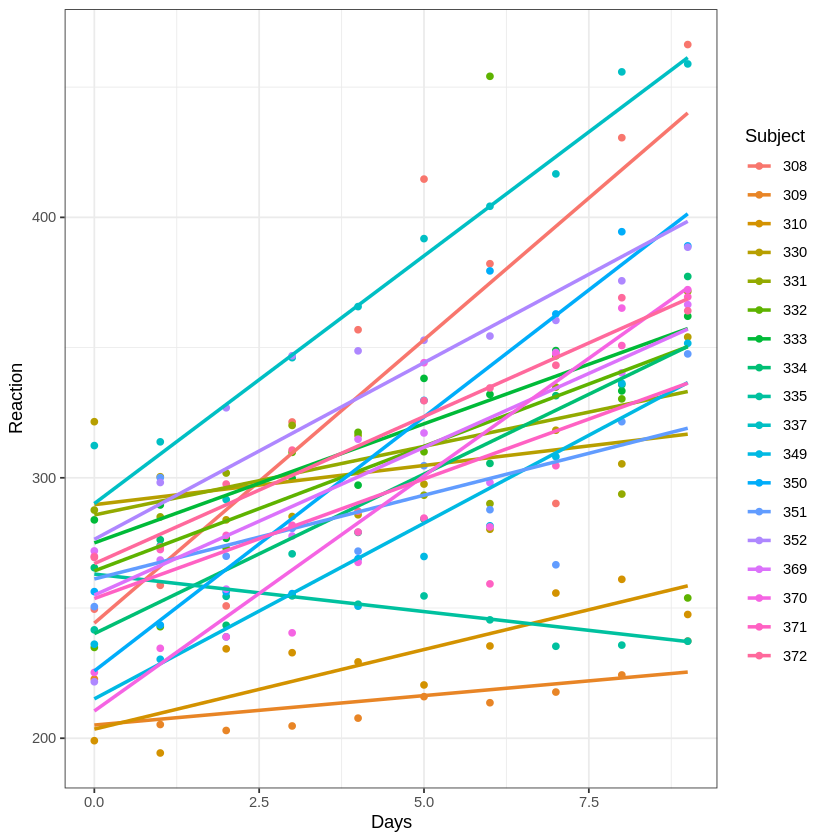

In [ ]:
# Visualise the correlation between the numerical variables
sleepstudy |>
  ggplot(aes(x = Days, y = Reaction, color = Subject)) +
  geom_point() +
  geom_smooth(method = lm, se = F) +
  theme_bw()

From the figure, it appears that random intercept and random slope need to be fitted

# 3. Model fitting

In [ ]:
# Fitting models to see if the random term needs to be added
m0.glm <- glm(Reaction ~ 1, family = gaussian, data = sleepstudy) # intercept-only model
m0.lmm <- lmer(Reaction ~ 1 + (1|Subject), REML = TRUE, data = sleepstudy) # model with the random effect

In [ ]:
# Testing AIC
print(paste0("AIC for the intercept-only model: ", AIC(logLik(m0.glm))))
print(paste0("AIC for the intercept-only model with random effect: ", AIC(logLik(m0.lmm))))

[1] "AIC for the intercept-only model: 1965.04895170189"
[1] "AIC for the intercept-only model with random effect: 1910.32651707221"


**Conclusion:** Random effect needs to be added

In [ ]:
# Adding Days to the model
m1.lmm <- lmer(Reaction ~ Days + (1|Subject), REML = TRUE, data = sleepstudy) # Random intercept
m2.lmm <- lmer(Reaction ~ Days + (1 + Days|Subject), REML = TRUE, data = sleepstudy) # Random intercept and random slope
anova(m1.lmm, m2.lmm, method = "Chi") # Compare the two models

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1.lmm,4,1802.079,1814.850,-897.0393,1794.079,NA,NA,NA
m2.lmm,6,1763.939,1783.097,-875.9697,1751.939,42.1393,2,7.072413e-10


In [ ]:
# Look at the AIC
print(paste0("AIC for the model with only random intercept: ", AIC(logLik(m1.lmm))))
print(paste0("AIC for the model with random intercept and random slope: ", AIC(logLik(m2.lmm))))

[1] "AIC for the model with only random intercept: 1794.46508539492"
[1] "AIC for the model with random intercept and random slope: 1755.62827195995"


**Conclusion:** The model with random intercept and random slope is the best one

In [ ]:
# Summary of the model
summary(m2.lmm)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (1 + Days | Subject)
   Data: sleepstudy

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4634  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 612.10   24.741       
          Days         35.07    5.922   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.825  36.838
Days          10.467      1.546   6.771

Correlation of Fixed Effects:
     (Intr)
Days -0.138

# 4. Model diagnostics

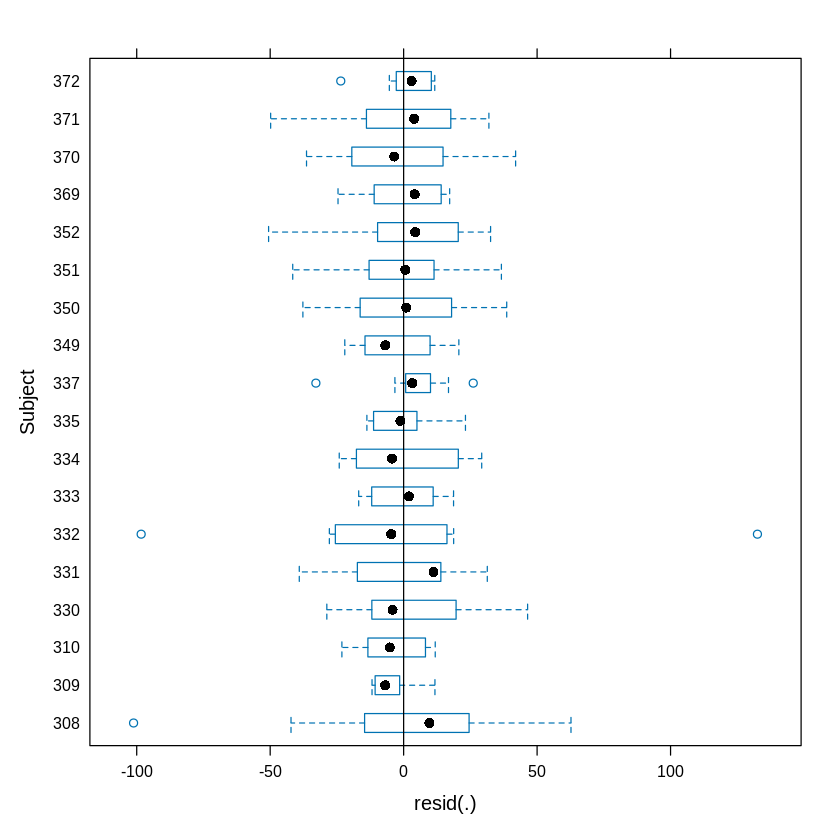

In [ ]:
# Diagnostic plot
plot(m2.lmm, Subject ~ resid(.), abline = 0)

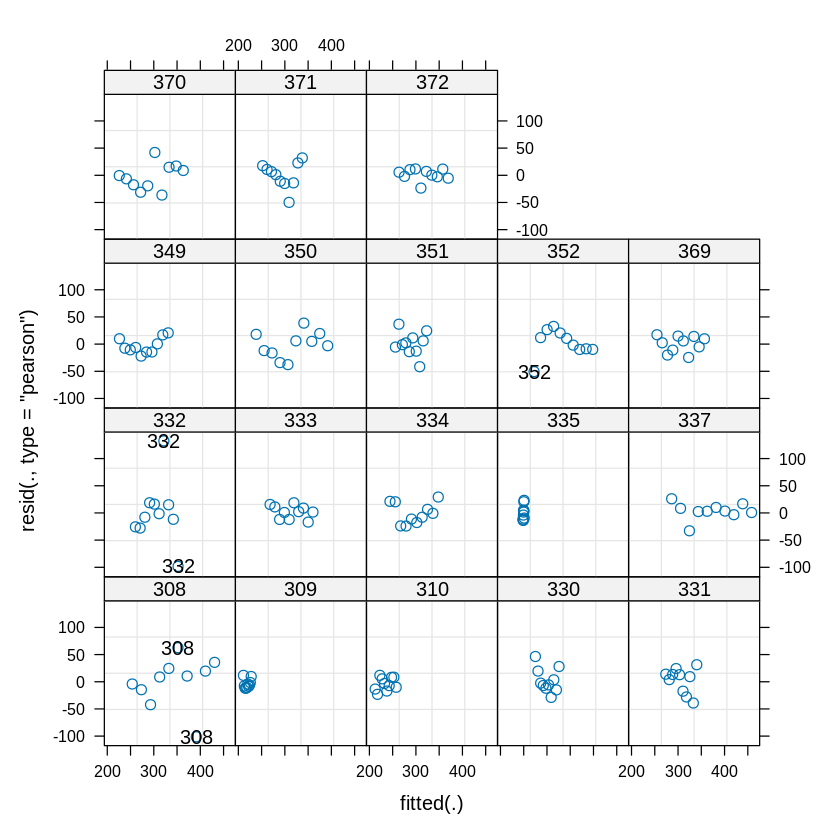

In [ ]:
# Further diagnosis
plot(m2.lmm, resid(., type = "pearson") ~ fitted(.) | Subject, id = 0.05)

In [ ]:
# Perform homogeneity of variance test
leveneTest(sleepstudy$Reaction, sleepstudy$Subject, center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,17,5.456917,1.541257e-09
,162,NA,NA


Variance is unevenly distributed

In [ ]:
?varIdent

In [ ]:
# Adding weights
m3.lmm <- lme(Reaction ~ Days, random = ~1+Days|Subject, data = sleepstudy, method = "ML")
m4.lmm <- update(m3.lmm, weights = varIdent(form = ~ 1|Subject)) # allowing different residual varaince for each subject

In [ ]:
# Anova
anova(m3.lmm, m4.lmm)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
m3.lmm,"lme.formula(fixed = Reaction ~ Days, data = sleepstudy, random = ~1 + Days | Subject, method = ""ML"")",1,6,1763.939,1783.097,-875.9697,,NA,NA
m4.lmm,"lme.formula(fixed = Reaction ~ Days, data = sleepstudy, random = ~1 + Days | Subject, weights = varIdent(form = ~1 | Subject), method = ""ML"")",2,23,1720.575,1794.013,-837.2874,1 vs 2,77.36453,1.122414e-09


In [ ]:
# Summary of the model
summary(m4.lmm)

Linear mixed-effects model fit by maximum likelihood
  Data: sleepstudy 
       AIC      BIC    logLik
  1720.575 1794.013 -837.2874

Random effects:
 Formula: ~1 + Days | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 26.208755 (Intr)
Days         5.697211 0.038 
Residual    47.678959       

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | Subject 
 Parameter estimates:
      308       309       310       330       331       332       333       334 
1.0000000 0.1857821 0.2583612 0.4821724 0.4972721 1.2128584 0.2603923 0.4253803 
      335       337       349       350       351       352       369       370 
0.2422007 0.3396697 0.2959661 0.5242093 0.4708745 0.5248681 0.3282729 0.5276306 
      371       372 
0.5142160 0.2353084 
Fixed effects:  Reaction ~ Days 
                Value Std.Error  DF  t-value p-value
(Intercept) 251.97956  6.889335 161 36.57531       0
Days       

In [ ]:
# Extract estimates and sd for fixed effects
intervals(m4.lmm, which="fixed")

Approximate 95% confidence intervals

 Fixed effects:
                 lower      est.     upper
(Intercept) 238.450236 251.97956 265.50887
Days          7.379482  10.25216  13.12483

In [ ]:
# Extract estimates and sd for all
intervals(m4.lmm)

Approximate 95% confidence intervals

 Fixed effects:
                 lower      est.     upper
(Intercept) 238.450236 251.97956 265.50887
Days          7.379482  10.25216  13.12483

 Random Effects:
  Level: Subject 
                           lower        est.      upper
sd((Intercept))       17.9101449 26.20875476 38.3524996
sd(Days)               3.8920265  5.69721118  8.3396696
cor((Intercept),Days) -0.4611143  0.03836216  0.5193779

 Variance function:
         lower      est.     upper
309 0.09172509 0.1857821 0.3762874
310 0.12730107 0.2583612 0.5243516
330 0.23353565 0.4821724 0.9955234
331 0.24272170 0.4972721 1.0187780
332 0.60336383 1.2128584 2.4380407
333 0.12844767 0.2603923 0.5278737
334 0.21139005 0.4253803 0.8559930
335 0.11847248 0.2422007 0.4951462
337 0.16779299 0.3396697 0.6876060
349 0.14500742 0.2959661 0.6040791
350 0.25456554 0.5242093 1.0794684
351 0.23398620 0.4708745 0.9475891
352 0.26224505 0.5248681 1.0504925
369 0.16299769 0.3282729 0.6611327
370 0.25440

# 5. Effect sizes

In [ ]:
# More appropriate conditional and marginal coefficients of r-square
# The function comes from the MuMIn package
print(paste0("The r-squared values for the initial model: ", r.squaredGLMM(m1.lmm)))
print(paste0("The r-squared values for the model without adjusting for heteroscedasticity: ", r.squaredGLMM(m3.lmm)))
print(paste0("The r-squared values for the final model: ", r.squaredGLMM(m4.lmm)))

[1] "The r-squared values for the initial model: 0.279885636748625"
[2] "The r-squared values for the initial model: 0.704255452354521"
[1] "The r-squared values for the model without adjusting for heteroscedasticity: 0.287611793262863"
[2] "The r-squared values for the model without adjusting for heteroscedasticity: 0.792762582526844"
[1] "The r-squared values for the final model: 0.181330132765973"
[2] "The r-squared values for the final model: 0.527262960152383"


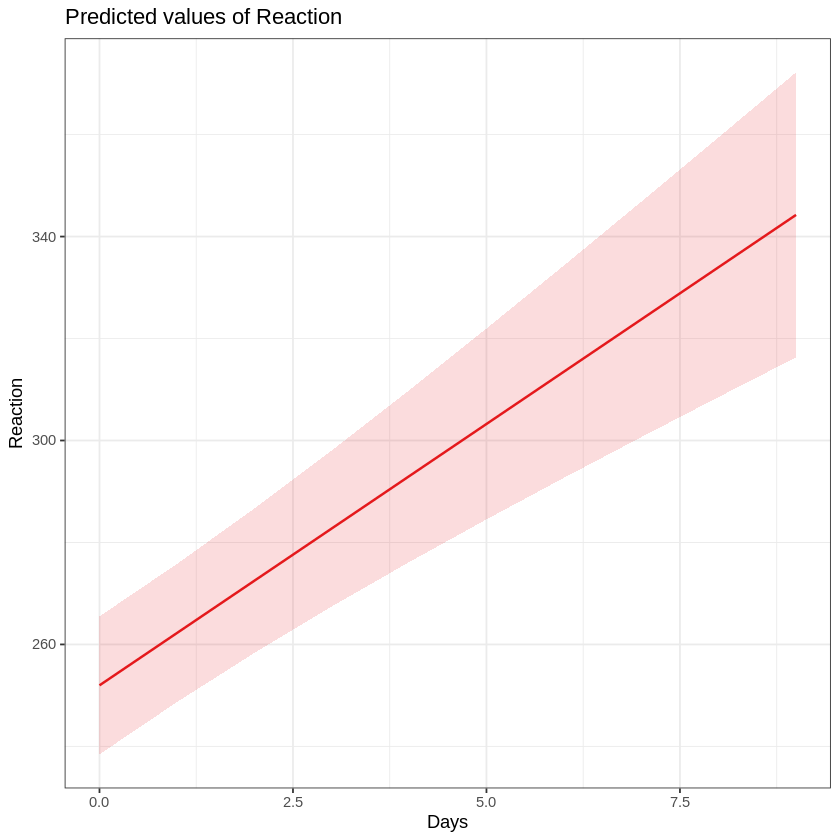

In [ ]:
# Plot model
sjPlot::plot_model(m4.lmm, type = "pred", terms = c("Days")) + theme_bw()

# 6. Diagnostics (again)

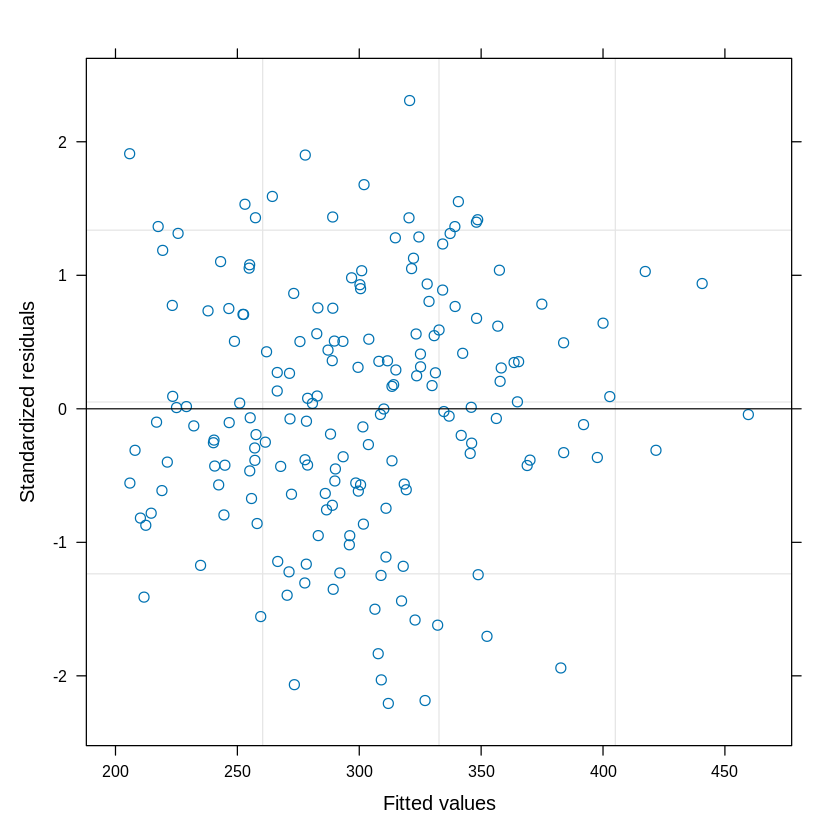

In [ ]:
# Plot
plot(m4.lmm)

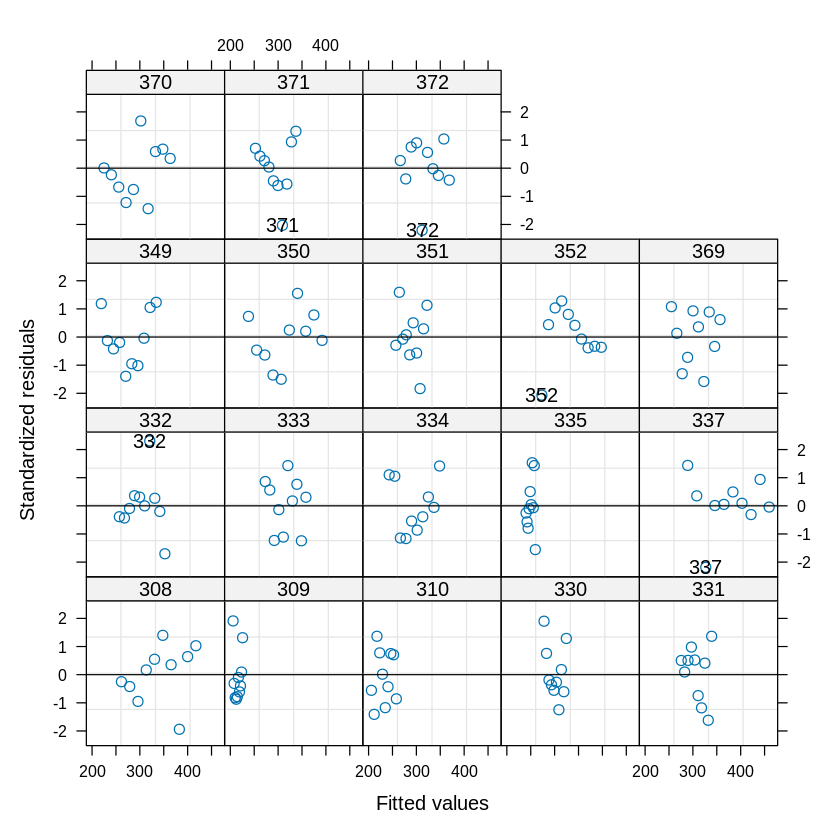

In [ ]:
# Plot fitted values and residuals for each subject
plot(m4.lmm, form = resid(., type = "p") ~ fitted(.) |Subject, abline = 0, id = 0.05)

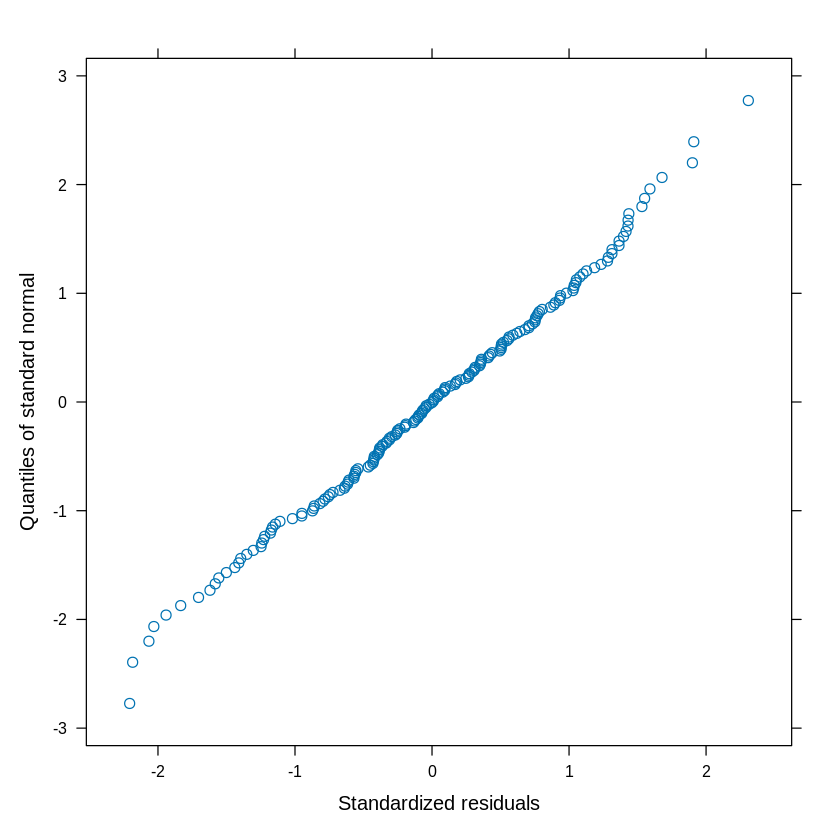

In [ ]:
# qqnorm
qqnorm(m4.lmm)

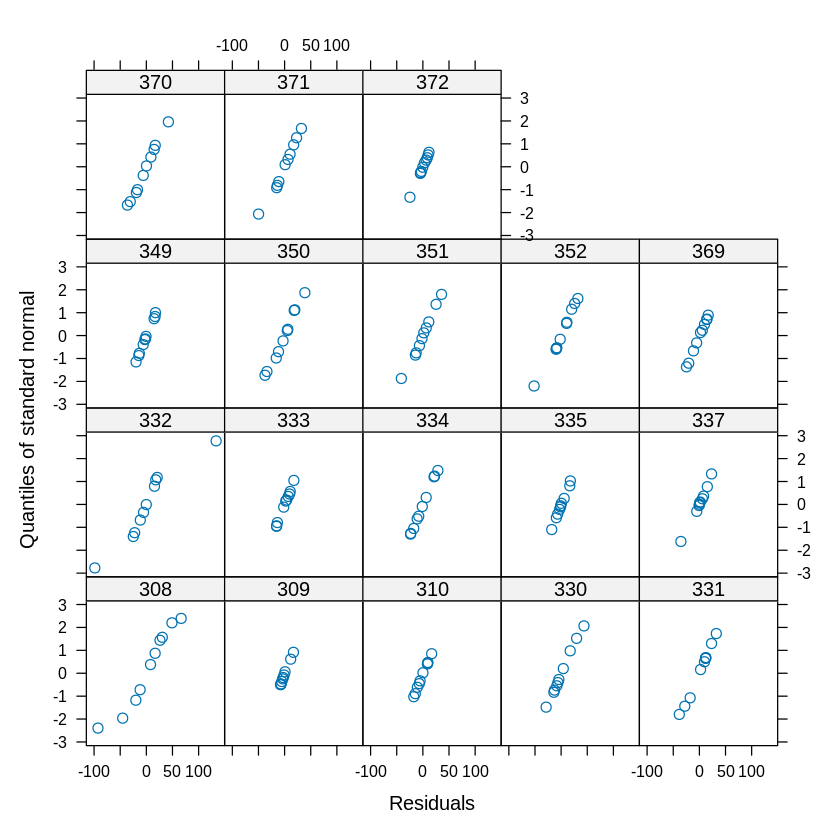

In [ ]:
# qq plot per subject
qqnorm(m4.lmm, ~resid(.) | Subject)

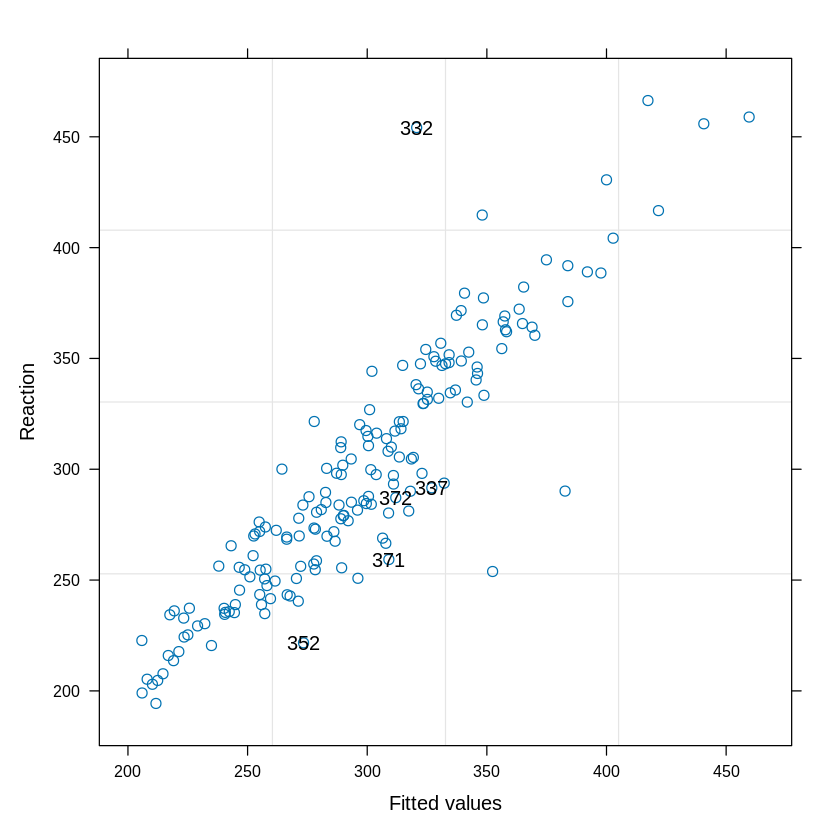

In [ ]:
# Responses vs within-group fitted values
plot(m4.lmm, Reaction ~ fitted(.), id = 0.05)

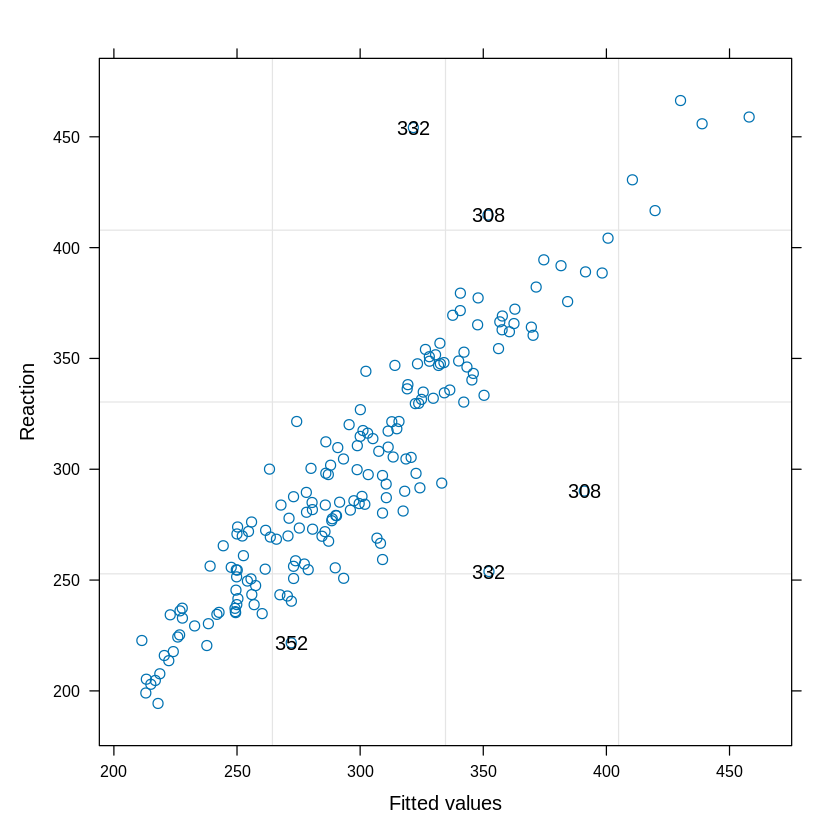

In [ ]:
# Responses vs within-group fitted values - when variance difference is not accounted for
plot(m3.lmm, Reaction ~ fitted(.), id = 0.05)

# 7. Reporting

In [ ]:
summary(m4.lmm)

Linear mixed-effects model fit by maximum likelihood
  Data: sleepstudy 
       AIC      BIC    logLik
  1720.575 1794.013 -837.2874

Random effects:
 Formula: ~1 + Days | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 26.208755 (Intr)
Days         5.697211 0.038 
Residual    47.678959       

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | Subject 
 Parameter estimates:
      308       309       310       330       331       332       333       334 
1.0000000 0.1857821 0.2583612 0.4821724 0.4972721 1.2128584 0.2603923 0.4253803 
      335       337       349       350       351       352       369       370 
0.2422007 0.3396697 0.2959661 0.5242093 0.4708745 0.5248681 0.3282729 0.5276306 
      371       372 
0.5142160 0.2353084 
Fixed effects:  Reaction ~ Days 
                Value Std.Error  DF  t-value p-value
(Intercept) 251.97956  6.889335 161 36.57531       0
Days       

In [ ]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] flextable_0.9.9     lubridate_1.9.4     forcats_1.0.0      
 [4] stringr_1.5.1       dplyr_1.1.4         purrr_1.1.0        
 [7] readr_2.1.5         tidyr_1.3.